<a href="https://colab.research.google.com/github/YonDraco/learn-pyimagesearch/blob/master/2_stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

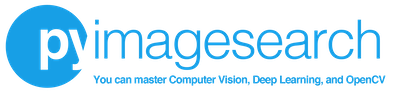

# Stochastic Gradient Descent (SGD) with Python
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [Stochastic Gradient Descent (SGD) with Python](https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/) blog post published on 2016-10-17.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch Plus at http://pyimg.co/plus/ today.*

### Download the code zip file

In [1]:
!wget https://www.pyimagesearch.com/wp-content/uploads/2016/08/stochastic-gradient-descent.zip
!unzip -qq stochastic-gradient-descent.zip
%cd stochastic-gradient-descent

--2021-08-25 16:19:18--  https://www.pyimagesearch.com/wp-content/uploads/2016/08/stochastic-gradient-descent.zip
Resolving www.pyimagesearch.com (www.pyimagesearch.com)... 172.104.211.12
Connecting to www.pyimagesearch.com (www.pyimagesearch.com)|172.104.211.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1841 (1.8K) [application/zip]
Saving to: ‘stochastic-gradient-descent.zip’

stochastic-gradient 100%[===================>]   1.80K  --.-KB/s    in 0s      

2021-08-25 16:19:18 (189 MB/s) - ‘stochastic-gradient-descent.zip’ saved [1841/1841]

/content/stochastic-gradient-descent


## Blog Post Code

### Import Packages

In [2]:
# import the necessary packages
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Implementing Stochastic Gradient Descent (SGD) with Python

In [3]:
def sigmoid_activation(x):
	# compute and return the sigmoid activation value for a
	# given input value
	return 1.0 / (1 + np.exp(-x))

In [4]:
def next_batch(X, y, batchSize):
	# loop over our dataset `X` in mini-batches of size `batchSize`
	for i in np.arange(0, X.shape[0], batchSize):
		# yield a tuple of the current batched data and labels
		yield (X[i:i + batchSize], y[i:i + batchSize])

In [5]:
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-e", "--epochs", type=float, default=100,
# 	help="# of epochs")
# ap.add_argument("-a", "--alpha", type=float, default=0.01,
# 	help="learning rate")
# ap.add_argument("-b", "--batch-size", type=int, default=32,
# 	help="size of SGD mini-batches")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"epochs": 100,
	"alpha": 0.01,
    "batch_size": 32
}

In [6]:
# generate a 2-class classification problem with 400 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=400, n_features=2, centers=2,
	cluster_std=2.5, random_state=95)

In [7]:
# insert a column of 1's as the first entry in the feature
# vector -- this is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones((X.shape[0])), X]

# initialize our weight matrix such it has the same number of
# columns as our input features
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))

# initialize a list to store the loss value for each epoch
lossHistory = []

[INFO] starting training...


In [8]:
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
	# initialize the total loss for the epoch
	epochLoss = []

	# loop over our data in batches
	for (batchX, batchY) in next_batch(X, y, args["batch_size"]):
		# take the dot product between our current batch of
		# features and weight matrix `W`, then pass this value
		# through the sigmoid activation function
		preds = sigmoid_activation(batchX.dot(W))

		# now that we have our predictions, we need to determine
		# our `error`, which is the difference between our predictions
		# and the true values
		error = preds - batchY

		# given our `error`, we can compute the total loss value on
		# the batch as the sum of squared loss
		loss = np.sum(error ** 2)
		epochLoss.append(loss)

		# the gradient update is therefore the dot product between
		# the transpose of our current batch and the error on the
		# # batch
		gradient = batchX.T.dot(error) / batchX.shape[0]

		# use the gradient computed on the current batch to take
		# a "step" in the correct direction
		W += -args["alpha"] * gradient

	# update our loss history list by taking the average loss
	# across all batches
	lossHistory.append(np.average(epochLoss))

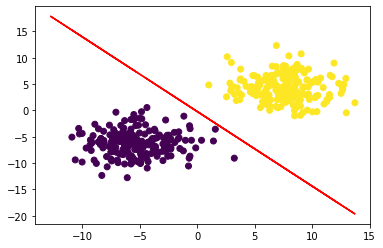

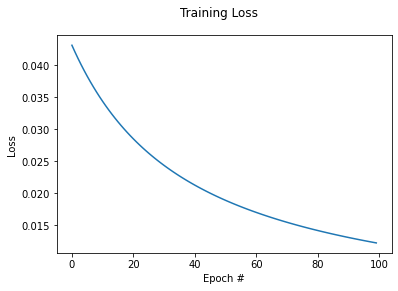

In [9]:
# compute the line of best fit by setting the sigmoid function
# to 0 and solving for X2 in terms of X1
Y = (-W[0] - (W[1] * X)) / W[2]

# plot the original data along with our line of best fit
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, args["epochs"]), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Stochastic Gradient Descent (SGD) with Python*](https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/) blog post published on 2016-10-17.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```

**[Gradient Descent Algorithms and Variations](https://www.pyimagesearch.com/2021/05/05/gradient-descent-algorithms-and-variations/)**